In [7]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score



In [12]:
faces=fetch_olivetti_faces()
X,y=faces.data,faces.target
df = pd.DataFrame(X, columns=[f'pixel_{i}' for i in range(X.shape[1])])
df['target'] = y  # Optional: add target column

df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [13]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA

Original shape: (320, 4096)
Reduced shape: (320, 100)
[0.26222047 0.1215409  0.08242231 0.04706794 0.03380853 0.02974392
 0.02319226 0.02013259 0.01918354 0.01683035 0.01556713 0.01340432
 0.01263977 0.01196303 0.01127409 0.01013063 0.00871452 0.00847334
 0.00819237 0.00740542 0.00701679 0.00648177 0.00622798 0.00588091
 0.00550368 0.00524574 0.00507819 0.0048961  0.00460966 0.00426981
 0.00406107 0.00404522 0.00372763 0.00351554 0.00347026 0.00339208
 0.00313169 0.00306763 0.00300127 0.00286852 0.00280556 0.00262068
 0.00257306 0.00253803 0.00246754 0.00240314 0.00230774 0.00225374
 0.00220491 0.00214233 0.00209175 0.00199888 0.00190624 0.00185078
 0.00177815 0.00175883 0.0017298  0.00171235 0.00168531 0.00163395
 0.00159884 0.001569   0.00155387 0.00149823 0.00146867 0.00144339
 0.00142362 0.00138642 0.00134891 0.00133094 0.00132186 0.00128299
 0.00127339 0.00123634 0.00122076 0.00118974 0.00115642 0.00115077
 0.00111618 0.00111248 0.00108816 0.00107315 0.00103636 0.00103339
 0.00099

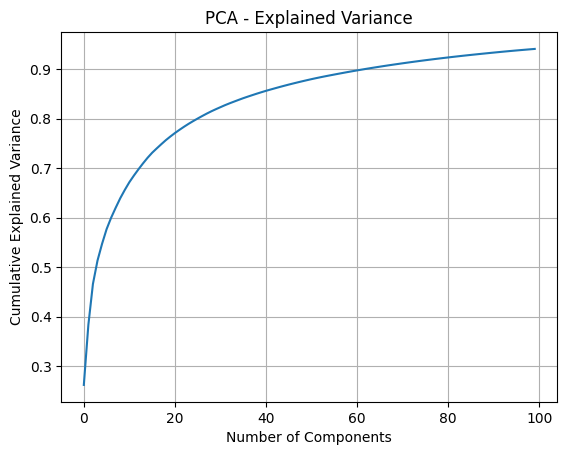

In [24]:
pca=PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Original shape:", X_train_scaled.shape)
print("Reduced shape:", X_train_pca.shape)
print(pca.explained_variance_ratio_)

# Explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.grid()
plt.show()



# KNeighborsClassifier

In [26]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)

print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
      

k-NN Accuracy: 0.8625
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.60      0.75      0.67         4
           4       0.50      1.00      0.67         3
           5       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         6
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      0.67      0.80         3
          12       0.50      0.50      0.50         2
          13       1.00      1.00      1.00         1
          14       0.60      1.00      0.75         3
          15       1.00      1.00      1.00         2
          17       0.75      1.00      0.86         3
          18       1.00      1.00      1.00         1
     

e:\6th sem\GEN AI\GEN_AI_New\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\6th sem\GEN AI\GEN_AI_New\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\6th sem\GEN AI\GEN_AI_New\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
nb=GaussianNB()
nb.fit(X_train_pca, y_train)
y_pred_nb = nb.predict(X_test_pca)

print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naïve Bayes Accuracy: 0.8375
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         1
           2       0.50      0.50      0.50         2
           3       1.00      1.00      1.00         4
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         0
           7       1.00      0.17      0.29         6
           8       1.00      1.00      1.00         2
           9       0.29      1.00      0.44         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       0.50      1.00      0.67         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         3
          15       1.00      0.50      0.67         2
          17       1.00      0.67      0.80         

e:\6th sem\GEN AI\GEN_AI_New\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\6th sem\GEN AI\GEN_AI_New\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\6th sem\GEN AI\GEN_AI_New\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train_pca, y_train)
y_pred_dt = dt.predict(X_test_pca)

print("Decision Tree (ID3) Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree (ID3) Accuracy: 0.425
              precision    recall  f1-score   support

           0       0.17      0.33      0.22         3
           1       1.00      1.00      1.00         1
           2       0.17      0.50      0.25         2
           3       0.50      0.25      0.33         4
           4       0.50      0.33      0.40         3
           5       0.50      0.67      0.57         3
           6       0.00      0.00      0.00         0
           7       1.00      0.17      0.29         6
           8       0.50      0.50      0.50         2
           9       0.00      0.00      0.00         2
          10       0.50      0.50      0.50         2
          11       0.00      0.00      0.00         3
          12       0.33      0.50      0.40         2
          13       1.00      1.00      1.00         1
          14       1.00      0.33      0.50         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00  

e:\6th sem\GEN AI\GEN_AI_New\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\6th sem\GEN AI\GEN_AI_New\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\6th sem\GEN AI\GEN_AI_New\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\6th sem\GEN AI\GEN_AI_New\lib\sit

In [32]:
from sklearn.tree import export_text

tree_rules=export_text(dt)
print(tree_rules)

|--- feature_6 <= -2.01
|   |--- feature_0 <= -3.44
|   |   |--- feature_5 <= 0.56
|   |   |   |--- feature_20 <= -0.32
|   |   |   |   |--- feature_3 <= 0.59
|   |   |   |   |   |--- class: 32
|   |   |   |   |--- feature_3 >  0.59
|   |   |   |   |   |--- class: 36
|   |   |   |--- feature_20 >  -0.32
|   |   |   |   |--- feature_14 <= 1.41
|   |   |   |   |   |--- feature_56 <= 3.30
|   |   |   |   |   |   |--- class: 28
|   |   |   |   |   |--- feature_56 >  3.30
|   |   |   |   |   |   |--- class: 25
|   |   |   |   |--- feature_14 >  1.41
|   |   |   |   |   |--- class: 21
|   |   |--- feature_5 >  0.56
|   |   |   |--- feature_26 <= 0.45
|   |   |   |   |--- feature_10 <= -2.12
|   |   |   |   |   |--- class: 23
|   |   |   |   |--- feature_10 >  -2.12
|   |   |   |   |   |--- feature_1 <= -6.94
|   |   |   |   |   |   |--- feature_46 <= -1.85
|   |   |   |   |   |   |   |--- class: 20
|   |   |   |   |   |   |--- feature_46 >  -1.85
|   |   |   |   |   |   |   |--- class: 11
| 